In [1]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np

In [2]:
key = '24d1fa8f1e68bedf4ca5a9d02fd58834bbc25ac3'
print(key)

24d1fa8f1e68bedf4ca5a9d02fd58834bbc25ac3


In [3]:
df = pdr.get_data_tiingo('GOOG', api_key = key)

In [4]:
df.to_csv('GOOG.csv')

In [5]:
df = pd.read_csv('GOOG.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-05-12 00:00:00+00:00,713.31,719.2500,709.00,717.06,1361332,713.31,719.2500,709.00,717.06,1361332,0.0,1.0
1,GOOG,2016-05-13 00:00:00+00:00,710.83,716.6619,709.26,711.93,1314499,710.83,716.6619,709.26,711.93,1314499,0.0,1.0
2,GOOG,2016-05-16 00:00:00+00:00,716.49,718.4800,705.65,709.13,1317069,716.49,718.4800,705.65,709.13,1317069,0.0,1.0
3,GOOG,2016-05-17 00:00:00+00:00,706.23,721.5200,704.11,715.99,2001225,706.23,721.5200,704.11,715.99,2001225,0.0,1.0
4,GOOG,2016-05-18 00:00:00+00:00,706.63,711.6000,700.63,703.67,1766836,706.63,711.6000,700.63,703.67,1766836,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOG,2021-05-04 00:00:00+00:00,2354.25,2379.26,2311.7000,2369.74,1756015,2354.25,2379.26,2311.7000,2369.74,1756015,0.0,1.0
1253,GOOG,2021-05-05 00:00:00+00:00,2356.74,2382.20,2351.4100,2368.42,1090275,2356.74,2382.20,2351.4100,2368.42,1090275,0.0,1.0
1254,GOOG,2021-05-06 00:00:00+00:00,2381.35,2382.71,2342.3382,2350.64,1030859,2381.35,2382.71,2342.3382,2350.64,1030859,0.0,1.0
1255,GOOG,2021-05-07 00:00:00+00:00,2398.69,2416.41,2390.0000,2400.00,1163892,2398.69,2416.41,2390.0000,2400.00,1163892,0.0,1.0
1256,GOOG,2021-05-10 00:00:00+00:00,2341.66,2378.00,2334.7300,2374.89,1300271,2341.66,2378.00,2334.7300,2374.89,1300271,0.0,1.0


In [8]:
df.count()

symbol         1257
date           1257
close          1257
high           1257
low            1257
open           1257
volume         1257
adjClose       1257
adjHigh        1257
adjLow         1257
adjOpen        1257
adjVolume      1257
divCash        1257
splitFactor    1257
dtype: int64

In [9]:
df1 = df.reset_index()['close']

In [10]:
df1

0        713.31
1        710.83
2        716.49
3        706.23
4        706.63
         ...   
1252    2354.25
1253    2356.74
1254    2381.35
1255    2398.69
1256    2341.66
Name: close, Length: 1257, dtype: float64

In [11]:
import matplotlib.pyplot as plt

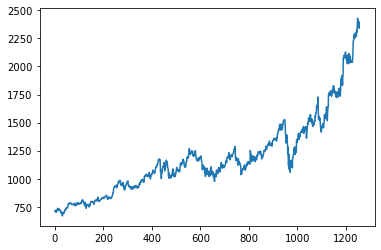

In [12]:
plt.plot(df1)

In [13]:
df1.shape

(1257,)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1.shape

(1257, 1)

In [16]:
df1

array([[0.02557291],
       [0.02416512],
       [0.02737805],
       ...,
       [0.97244597],
       [0.98228913],
       [0.9499157 ]])

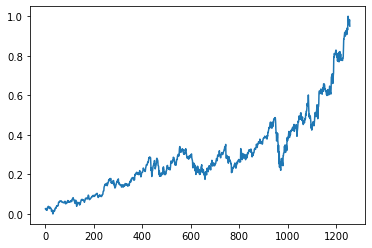

In [17]:
plt.plot(df1)

In [18]:
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_df, test_df = df1[0:train_size, :], df1[train_size : len(df1), : 1]

In [19]:
print(train_size, test_size)

817 440


In [20]:
def create_dataset(dataset, timestamp=1):
    dataX, datay = [], []
    for i in range(len(dataset)-timestamp-1):
        a = dataset[i:(i+timestamp),0]
        dataX.append(a)
        datay.append(dataset[i+timestamp, 0])
    return np.array(dataX), np.array(datay)

In [21]:
timestamp = 100
X_train, y_train = create_dataset(train_df, timestamp)
X_test, y_test = create_dataset(test_df, timestamp)

In [22]:
X_train, y_train

(array([[0.02557291, 0.02416512, 0.02737805, ..., 0.06059729, 0.06189154,
         0.05920653],
        [0.02416512, 0.02737805, 0.0215539 , ..., 0.06189154, 0.05920653,
         0.06140336],
        [0.02737805, 0.0215539 , 0.02178096, ..., 0.05920653, 0.06140336,
         0.06142607],
        ...,
        [0.29364282, 0.29302407, 0.29291054, ..., 0.30696003, 0.29843384,
         0.27477961],
        [0.29302407, 0.29291054, 0.30119265, ..., 0.29843384, 0.27477961,
         0.28478738],
        [0.29291054, 0.30119265, 0.31545217, ..., 0.27477961, 0.28478738,
         0.28708072]]),
 array([0.06140336, 0.06142607, 0.06164745, 0.06063702, 0.06680177,
        0.0651726 , 0.0669153 , 0.06240243, 0.06259544, 0.06340719,
        0.07209232, 0.07566856, 0.07306302, 0.07442539, 0.08222498,
        0.07913694, 0.07425509, 0.07214341, 0.07215477, 0.06600705,
        0.06547913, 0.05701538, 0.05328588, 0.05322344, 0.06486038,
        0.06939596, 0.06644415, 0.05352997, 0.04868219, 0.03849844,
 

In [23]:
print(X_train.shape, y_train.shape)

(716, 100) (716,)


In [24]:
print(X_test.shape, y_test.shape)

(339, 100) (339,)


In [25]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [38]:
np.__version__

'1.19.5'

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 91,101
Trainable params: 91,101
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0104 - val_loss: 0.0797
Epoch 2/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0020 - val_loss: 0.0364
Epoch 3/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0011 - val_loss: 0.0099
Epoch 4/100
12/12 [==============================] - 1s 117ms/step - loss: 5.7193e-04 - val_loss: 0.0037
Epoch 5/100
12/12 [==============================] - 1s 120ms/step - loss: 5.3000e-04 - val_loss: 0.0045
Epoch 6/100
12/12 [==============================] - 1s 117ms/step - loss: 4.9449e-04 - val_loss: 0.0052
Epoch 7/100
12/12 [==============================] - 1s 116ms/step - loss: 4.9777e-04 - val_loss: 0.0050
Epoch 8/100
12/12 [==============================] - 1s 117ms/step - loss: 4.7420e-04 - val_loss: 0.0056
Epoch 9/100
12/12 [==============================] - 1s 118ms/step - loss: 4.6484e-04 - val_loss: 0.0056
Epoch 10/100
12/12 [==============================] - 1s 117ms/step

12/12 [==============================] - 1s 120ms/step - loss: 2.4363e-04 - val_loss: 0.0077
Epoch 79/100
12/12 [==============================] - 1s 121ms/step - loss: 2.2307e-04 - val_loss: 0.0067
Epoch 80/100
12/12 [==============================] - 1s 121ms/step - loss: 2.0101e-04 - val_loss: 0.0095
Epoch 81/100
12/12 [==============================] - 1s 120ms/step - loss: 2.1666e-04 - val_loss: 0.0053
Epoch 82/100
12/12 [==============================] - 1s 120ms/step - loss: 2.1289e-04 - val_loss: 0.0081
Epoch 83/100
12/12 [==============================] - 1s 119ms/step - loss: 1.8996e-04 - val_loss: 0.0082
Epoch 84/100
12/12 [==============================] - 1s 120ms/step - loss: 2.2148e-04 - val_loss: 0.0034
Epoch 85/100
12/12 [==============================] - 1s 122ms/step - loss: 2.3376e-04 - val_loss: 0.0109
Epoch 86/100
12/12 [==============================] - 1s 119ms/step - loss: 2.0489e-04 - val_loss: 0.0027
Epoch 87/100
12/12 [==============================] - 1s 11

In [41]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [42]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [43]:
import math
from sklearn.metrics import mean_squared_error

In [44]:
math.sqrt(mean_squared_error(y_train, train_pred))

1029.0316244309438

In [45]:
math.sqrt(mean_squared_error(y_test, test_pred))

1528.3613330595917

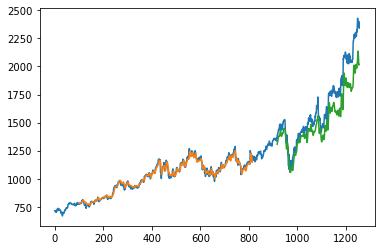

In [48]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df1)-1, :] = test_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()